### Importing the libraries.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

### 1) Reading the data set

In [2]:
start_up_companies = pd.read_csv(r'C:\Users\Jupally Pavan Kumar\Downloads\DS+-+Part3+-+CompanyX_EU.csv')

- Let's create a copy for the analysis

In [3]:
companies_1 = start_up_companies.copy()
companies_1.shape

(662, 6)

- There are 662 rows and 6 columns in the data set.

In [4]:
companies_1.head()

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating


In [6]:
companies_1.tail()

,Startup,Product,Funding,Event,Result,OperatingState
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating
659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating
660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating
661,Zumper,zumper.com,$31.5M,Disrupt SF 2012,Finalist,Operating


1) Here null values are assigned with '-'. Let's convert them into NaN's.
2) In the 'Funding' column, funds are given in various measures.

In [7]:
companies_1.replace('-', np.nan, inplace = True)

### 2.A) Checking the datatypes of each attribute.

In [8]:
companies_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Startup         662 non-null    object
 1   Product         656 non-null    object
 2   Funding         448 non-null    object
 3   Event           649 non-null    object
 4   Result          662 non-null    object
 5   OperatingState  662 non-null    object
dtypes: object(6)
memory usage: 31.2+ KB


1) There are six columns in the dataset and all are of object type.
2) But the funding column should be numeric as it contains the numerical data.

### 2.B) Checking for null values in the attributes.

In [9]:
companies_1.isnull().sum()

Startup             0
Product             6
Funding           214
Event              13
Result              0
OperatingState      0
dtype: int64

1) In 'Product' column there are 6 null values and in 'Funding' column there are 214 null values.
2) There are 13 Null values in the 'Event' column.

### 3.A) Let's drop the null values

In [10]:
companies_1['Event'].mode()

0    TC50 2008
Name: Event, dtype: object

In [11]:
# Let's fill the null values in 'Event' column with mode.
companies_1['Event'].fillna(value=companies_1['Event'].mode()[0], inplace=True)

In [12]:
# Let's drop the null values in the 'Funding' and 'Product' columns
companies_1.dropna(inplace = True)

In [13]:
companies_1.isnull().sum()

Startup           0
Product           0
Funding           0
Event             0
Result            0
OperatingState    0
dtype: int64

### 3.B) Converting the ‘Funding’ features to a numerical value.

- Here, funds are given in various measures. Let's convert them into Millions.

In [15]:
companies_1.loc[:,'Funds_in_million'] = companies_1['Funding'].apply(lambda x: float(x[1:-1])/1000 if x[-1] == 'K' else (float(x[1:-1])*1000 if x[-1] == 'B' else float(x[1:-1])))

### 3.C) Let's plot the box plot for funds in million.

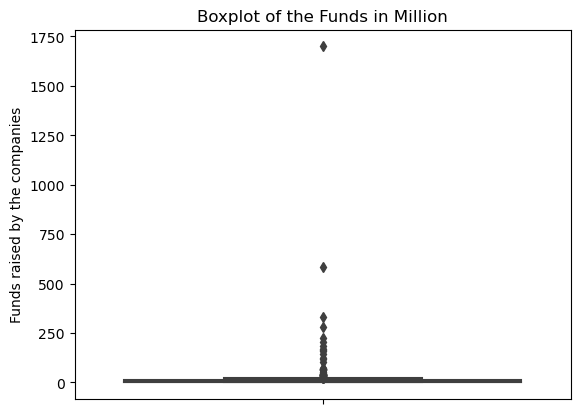

In [16]:
sns.boxplot(data = companies_1, y = 'Funds_in_million' )
plt.title('Boxplot of the Funds in Million')
plt.ylabel("Funds raised by the companies")

plt.show()

- There are a lot of significant outliers present in the data.

### 3.D) Let's check the number of outliers greater than the upper fence.

In [18]:
Q1 = companies_1['Funds_in_million'].quantile(0.25)
Q3 = companies_1['Funds_in_million'].quantile(0.75)
IQR = Q3 - Q1
upper_fence = Q3 + 1.5*IQR
n = len(companies_1[companies_1['Funds_in_million']>upper_fence])
print("Upper_fence is %d."%(upper_fence))
print("There are %d outliers greater than the upper_fence."%(n))

Upper_fence is 22.
There are 60 outliers greater than the upper_fence.


1) There are 60 records that have been funded excessively in comparision to the other companies in the data.
2) Let's drop these for further analysis.

In [19]:
companies_1.drop(companies_1[companies_1['Funds_in_million']>upper_fence].index, inplace = True)

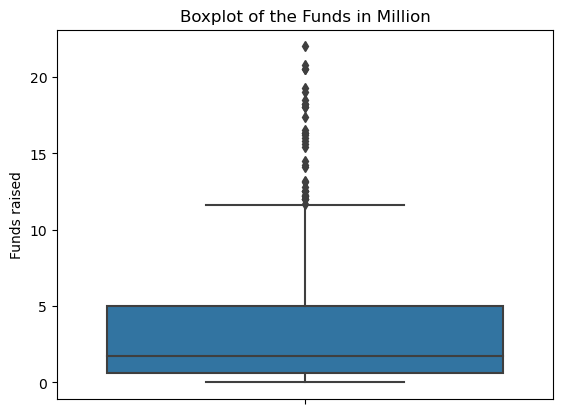

In [20]:
plot = sns.boxplot(data = companies_1, y = 'Funds_in_million' )
plt.title('Boxplot of the Funds in Million')
plt.ylabel("Funds raised")

plt.show()

- Even after dropping some rows, there are still a significant number of outliers present in the data.

### 3.E) Let's check frequency of the OperatingState features classes.

In [21]:
companies_1['OperatingState'].value_counts()

OperatingState
Operating    275
Closed        56
Acquired      55
Name: count, dtype: int64

- There are 275 companies that are still 'Operating', 56 have been 'Closed', and 55 have been 'Acquired'.

### 4.A) Let's look at the distribution of Funds raised by companies that are still operating vs companies that closed down

<Axes: title={'center': 'Funds raised by companies that got closed'}, xlabel='Funds_in_million', ylabel='Density'>

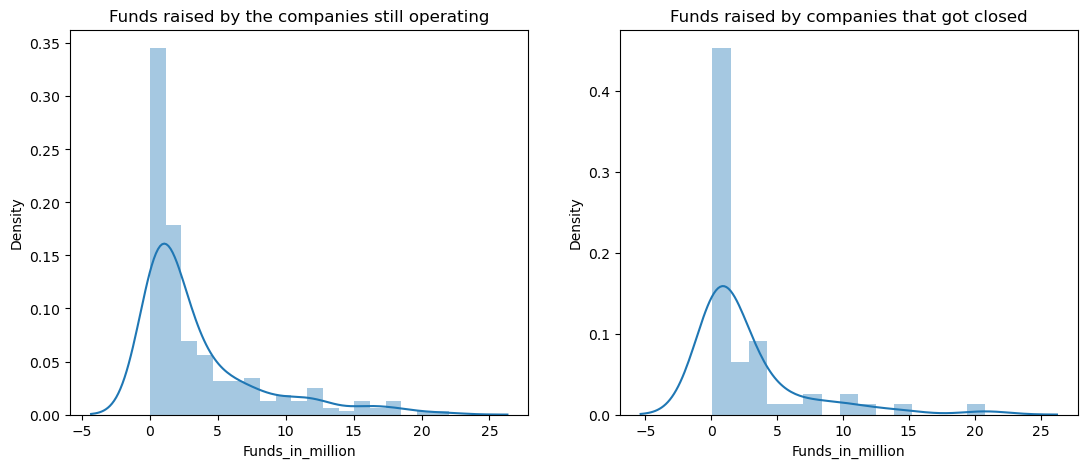

In [22]:
plt.figure(figsize = (13, 5))
plt.subplot(121)
plt.title('Funds raised by the companies still operating')
sns.distplot(companies_1.loc[companies_1['OperatingState'] == 'Operating', 'Funds_in_million'])
plt.subplot(122)
plt.title('Funds raised by companies that got closed')
sns.distplot(companies_1.loc[companies_1['OperatingState'] =='Closed', 'Funds_in_million'])

1) These two distributions looks quite similar.
2) To prove whether there is significant difference or not we can perform Hypothesis Test.

### 4.B) Let's write the null hypothesis and alternative hypothesis

**Null hypothesis (Ho)** : There is no difference between the two means

**Alternate hypothesis (Ha)** : There is significant difference between the two means

### 4.C) Test for significance and conclusion

1) Here data is not normally distributed, but the sample size is big(>=30).
2) Here we want to compare the difference in means of the samples, we can use two sample t-test and z-test.

### (i) Z-test:-

In [23]:
from statsmodels.stats.weightstats import ztest
# extract the data of Funds raised by companies that are still operating vs companies that closed down

samp_1 = companies_1.loc[companies_1['OperatingState'] == 'Operating', 'Funds_in_million']
samp_2 = companies_1.loc[companies_1['OperatingState'] == 'Closed', 'Funds_in_million']

# Let's assume level of significance is 0.05

alpha = 0.05

test_stat, p_value = ztest(samp_1, samp_2)

if p_value <= alpha:
    print("Here %.3f(p_value) < %.2f(alpha), we reject the null hypothesis."%(p_value, alpha))
else:
      print("Here %.3f(p_value) > %.2f(alpha), we fail to reject the null hypothesis."%(p_value, alpha))

Here 0.192(p_value) > 0.05(alpha), we fail to reject the null hypothesis.


### (ii) T-test

In [24]:
from scipy.stats import ttest_ind
test_stat, p_value = ttest_ind(samp_1, samp_2)

if p_value <= alpha:
    print('Here %.3f(p_value) < %.2f(alpha), we reject the null hypothesis.'%(p_value, alpha))
else:
    print('Here %.3f(p_value) > %.2f(alpha), we fail to reject the null hypothesis.'%(p_value, alpha))

Here 0.193(p_value) > 0.05(alpha), we fail to reject the null hypothesis.


### Conclusions

- From the above tests we can conclude that there is no evidence for rejecting the null hypothesis.
- Based on our analysis, we can conclude that there is no evidence indicating that companies which have raised more money are more likely to succeed, or that companies which have raised less money are more prone to closure.

### 4.D) Let's make a copy of the original data frame.

In [25]:
companies_2 = start_up_companies.copy(deep = True)

In [26]:
companies_2.head()

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating


### 4.E) Let's check frequency distribution of Result variables. 

In [27]:
companies_2['Result'].value_counts()

Result
Contestant         488
Finalist            84
Audience choice     41
Winner              26
Runner up           23
Name: count, dtype: int64

- Here 'Contestants' count is 488 and 'Winners' count is 26

### 4.F) Let's calculate percentage of winners that are still operating and percentage of contestants that are still operating 

- Let's count the counts of total 'winners' and 'contestants' in 'Result' column.

In [30]:
winners = companies_2['Result'].value_counts()['Winner']
contestants = companies_2['Result'].value_counts()['Contestant']

- Now count the total number of 'winners' that are still 'Operating' and total number of 'contestants' that are still 'Operating'.

In [31]:
win_operating = companies_2['OperatingState'][companies_2['Result'] == 'Winner'].value_counts().loc['Operating']
con_operating = companies_2['OperatingState'][companies_2['Result'] == 'Contestant'].value_counts().loc['Operating']

- Now calculate their percentages:

In [32]:
win_operating_p = win_operating/winners
con_operating_p = con_operating/contestants
print('percentage of winners that are still operating is %.3f'%(win_operating_p))
print('percentage of contestants that are still operating is %.3f'%(con_operating_p))

percentage of winners that are still operating is 0.731
percentage of contestants that are still operating is 0.680


### 4.G) Let's write the hypothesis comparing the proportion of companies that are operating between winners and contestants:

**Null hyputhesis (Ho)**: The proportion of companies that are operating is the same in both  winners and contestants


**Alternative hypothesis (Ha)**:  The proportion of companies that are operating is significantly different in both  winners and contestants


### 4.H) Test for significance and conclusion

- Based on the calculated percentages, there appears to be a slight difference in the proportion of companies that are operating between winners and contestants. Let's perform Hypothesis testing for evidence.
- We can perform z-test for proportions and chi-square test for conclusion

### (i) Z-test for Proportions

In [33]:
from statsmodels.stats.proportion import proportions_ztest

test_stat, p_value = proportions_ztest([con_operating, win_operating], [contestants, winners])

if p_value <= alpha:
    print('Since the %.2f(p_value) < %.2f(alpha), the difference is significant and we reject the Null hypothesis.'%(p_value, alpha))
else:
    print('''\t Since the %.3f(p_value) > %.2f(alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis.'''%(p_value, alpha))

	 Since the 0.590(p_value) > 0.05(alpha) the difference is not significant and,
    	 we fail to reject the Null hypothesis.


### (ii) Chi-square test

In [34]:
from scipy.stats import chi2_contingency

# Creating a contingency table
contingency_table = [[con_operating, contestants - con_operating], [win_operating, winners - win_operating]]

chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

alpha = 0.05     # Let's consider the significance level is 0.05

if p_value <= alpha:
    print('Since the %.2f(p_value) < %.2f(alpha), the difference is significant and we reject the Null hypothesis.'%(p_value, alpha))
else:
    print('''\t Since the %.3f(p_value) > %.2f(alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis.'''%(p_value, alpha))


	 Since the 0.747(p_value) > 0.05(alpha) the difference is not significant and,
    	 we fail to reject the Null hypothesis.


### Conclusions

- We can conclude that there is no significant difference between the proportions of winners that are still operating and the proportions of contestants that are still operating.

### 4.I) Let's select only the Event that has ‘disrupt’ keyword from 2013 onwards. 

In [35]:
disrupt_events = companies_2[companies_2['Event'].apply(lambda x: 'Disrupt' in x and int(x[-4:]) > 2012)]['Event']
print(disrupt_events )

0          Disrupt SF 2013
1         Disrupt NYC 2013
2          Disrupt SF 2016
3          Disrupt NY 2016
4         Disrupt NYC 2013
              ...         
646    Disrupt London 2015
648    Disrupt London 2015
653        Disrupt EU 2014
656       Disrupt NYC 2013
660        Disrupt SF 2013
Name: Event, Length: 276, dtype: object


In [36]:
disrupt_events_data = companies_2[(companies_2['Event'].str.startswith('Disrupt')) & (companies_2['Event'].str[-4:]> '2012')]
disrupt_events_data

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating
...,...,...,...,...,...,...
646,YayPay Inc,yaypay.com,$900K,Disrupt London 2015,Contestant,Operating
648,YOOBIC,yoobic.com,NaN,Disrupt London 2015,Finalist,Operating
653,ZAP!,zapreklam.com/,NaN,Disrupt EU 2014,Audience choice,Operating
656,Zenefits,zenefits.com,$583.6M,Disrupt NYC 2013,Finalist,Operating


- There are 276 rows in which 'Event' that has ‘Disrupt’ keyword from 2013 onwards in the original data set.